In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls  "/content/drive/My Drive/AML/Project/Data/".

davidson.csv		Train_2_gram_prep.csv	  wassem_css.csv
Merged_Raw_Data.csv	Train_3_gram_prep.csv	  wassem_hovy_naacl.csv
Merged_Raw_Data.gsheet	Validate_1_gram_prep.csv  wassem_hovy_naacl.gsheet
preprocessed_full.csv	Validate_2_gram_prep.csv
Train_1_gram_prep.csv	Validate_3_gram_prep.csv


In [4]:
!cp "/content/drive/My Drive/AML/Project/Data/Train_1_gram_prep.csv" .
!cp "/content/drive/My Drive/AML/Project/Data/Train_2_gram_prep.csv" .
!cp "/content/drive/My Drive/AML/Project/Data/Train_3_gram_prep.csv" .
!cp "/content/drive/My Drive/AML/Project/Data/Validate_1_gram_prep.csv" .
!cp "/content/drive/My Drive/AML/Project/Data/Validate_2_gram_prep.csv" .
!cp "/content/drive/My Drive/AML/Project/Data/Validate_3_gram_prep.csv" .

### Import Library



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# load the train and validate datasets with 1-3 grams
train1 = pd.read_csv("Train_1_gram_prep.csv")
val_1 = pd.read_csv("Validate_1_gram_prep.csv")

train2 = pd.read_csv("Train_2_gram_prep.csv")
val_2 = pd.read_csv("Validate_2_gram_prep.csv")

train3 = pd.read_csv("Train_3_gram_prep.csv")
val_3 = pd.read_csv("Validate_3_gram_prep.csv")

In [7]:
# separate features and labels
train1_feature = train1[train1.columns[:-1]]
train1_label = train1['Label']
val_1_feature = val_1[val_1.columns[:-1]]
val_1_label = val_1['Label']

train2_feature = train2[train2.columns[:-1]]
train2_label = train2['Label']
val_2_feature = val_2[val_2.columns[:-1]]
val_2_label = val_2['Label']

train3_feature = train3[train3.columns[:-1]]
train3_label = train3['Label']
val_3_feature = val_3[val_3.columns[:-1]]
val_3_label = val_3['Label']

In [ ]:
del train1
del val_1
del train1_feature
del train1_label
del val_1_feature
del val_1_label

In [ ]:
del train2
del val_2
del train2_feature
del train2_label
del val_2_feature
del val_2_label

In [ ]:
del train3
del val_3
del train3_feature
del train3_label
del val_3_feature
del val_3_label

### Implement the Naive Bayes Model from the sklearn libraries

In [9]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
nb_model = BernoulliNB()

### 1-gram

In [ ]:
nb_model.fit(train1_feature, train1_label)
prediction1 = nb_model.predict(val_1_feature)
print(classification_report(val_1_label, prediction1, digits=10))
print(confusion_matrix(val_1_label, prediction1))

              precision    recall  f1-score   support

         0.0  0.8466190214 0.8835341365 0.8646827625      3486
         1.0  0.9090298006 0.8790899242 0.8938092091      4615

    accuracy                      0.8810023454      8101
   macro avg  0.8778244110 0.8813120304 0.8792459858      8101
weighted avg  0.8821733661 0.8810023454 0.8812755968      8101

[[3080  406]
 [ 558 4057]]


### 2-gram

In [ ]:
nb_model = BernoulliNB()
nb_model.fit(train2_feature, train2_label)
prediction2 = nb_model.predict(val_2_feature)
print(classification_report(val_2_label, prediction2, digits=10))
print(confusion_matrix(val_2_label, prediction2))

              precision    recall  f1-score   support

         0.0  0.8295218295 0.9156626506 0.8704663212      3486
         1.0  0.9308723254 0.8578548212 0.8928732521      4615

    accuracy                      0.8827305271      8101
   macro avg  0.8801970775 0.8867587359 0.8816697867      8101
weighted avg  0.8872594593 0.8827305271 0.8832311634      8101

[[3192  294]
 [ 656 3959]]


### 3-gram

In [ ]:
nb_model = BernoulliNB()
nb_model.fit(train3_feature, train3_label)
prediction3 = nb_model.predict(val_3_feature)
print(classification_report(val_3_label, prediction3, digits=10))
print(confusion_matrix(val_3_label, prediction3))

              precision    recall  f1-score   support

         0.0  0.8279792746 0.9168100975 0.8701334059      3486
         1.0  0.9316199010 0.8561213434 0.8922764228      4615

    accuracy                      0.8822367609      8101
   macro avg  0.8797995878 0.8864657205 0.8812049143      8101
weighted avg  0.8870215522 0.8822367609 0.8827479008      8101

[[3196  290]
 [ 664 3951]]


### Result

In [ ]:
precision = [0.9090298006, 0.9308723254, 0.9316199010]
recall = [0.8790899242, 0.8578548212, 0.8561213434]
f_1_score = [0.8938092091, 0.8928732521, 0.8922764228]
accuracy = [0.8810023454, 0.8827305271, 0.8822367609]

print('The precision of "1-gram":', precision[0], '"2-gram":', precision[1], '"3-gram":', precision[2])
print('The recall of "1-gram":', recall[0], '"2-gram":', recall[1], '"3-gram":', recall[2])
print('The f_1_score of "1-gram":', f_1_score[0], '"2-gram":', f_1_score[1], '"3-gram":', f_1_score[2])
print('The accuracy of "1-gram":', accuracy[0], '"2-gram":', accuracy[1], '"3-gram":', accuracy[2])

The precision of "1-gram": 0.9090298006 "2-gram": 0.9308723254 "3-gram": 0.931619901
The recall of "1-gram": 0.8790899242 "2-gram": 0.8578548212 "3-gram": 0.8561213434
The f_1_score of "1-gram": 0.8938092091 "2-gram": 0.8928732521 "3-gram": 0.8922764228
The accuracy of "1-gram": 0.8810023454 "2-gram": 0.8827305271 "3-gram": 0.8822367609


We can see all the parametrics of the three n-grams are pretty similar to each other. As the dataset is kind of well-balanced, the accuracy is also reliable. The choice between precision and recall really depends on the focus of analysis. If we only make decision based on f-1-score, then the f-1-score with 1-gram is a little better than others. Thus we should choose 1-gram as the feature set.

## Retrain using 1-gram to get feature importance

In [10]:
nb_model = BernoulliNB()
nb_model.fit(train1_feature, train1_label)
prediction1 = nb_model.predict(val_1_feature)
print(classification_report(val_1_label, prediction1, digits=10))

              precision    recall  f1-score   support

         0.0  0.8466190214 0.8835341365 0.8646827625      3486
         1.0  0.9090298006 0.8790899242 0.8938092091      4615

    accuracy                      0.8810023454      8101
   macro avg  0.8778244110 0.8813120304 0.8792459858      8101
weighted avg  0.8821733661 0.8810023454 0.8812755968      8101



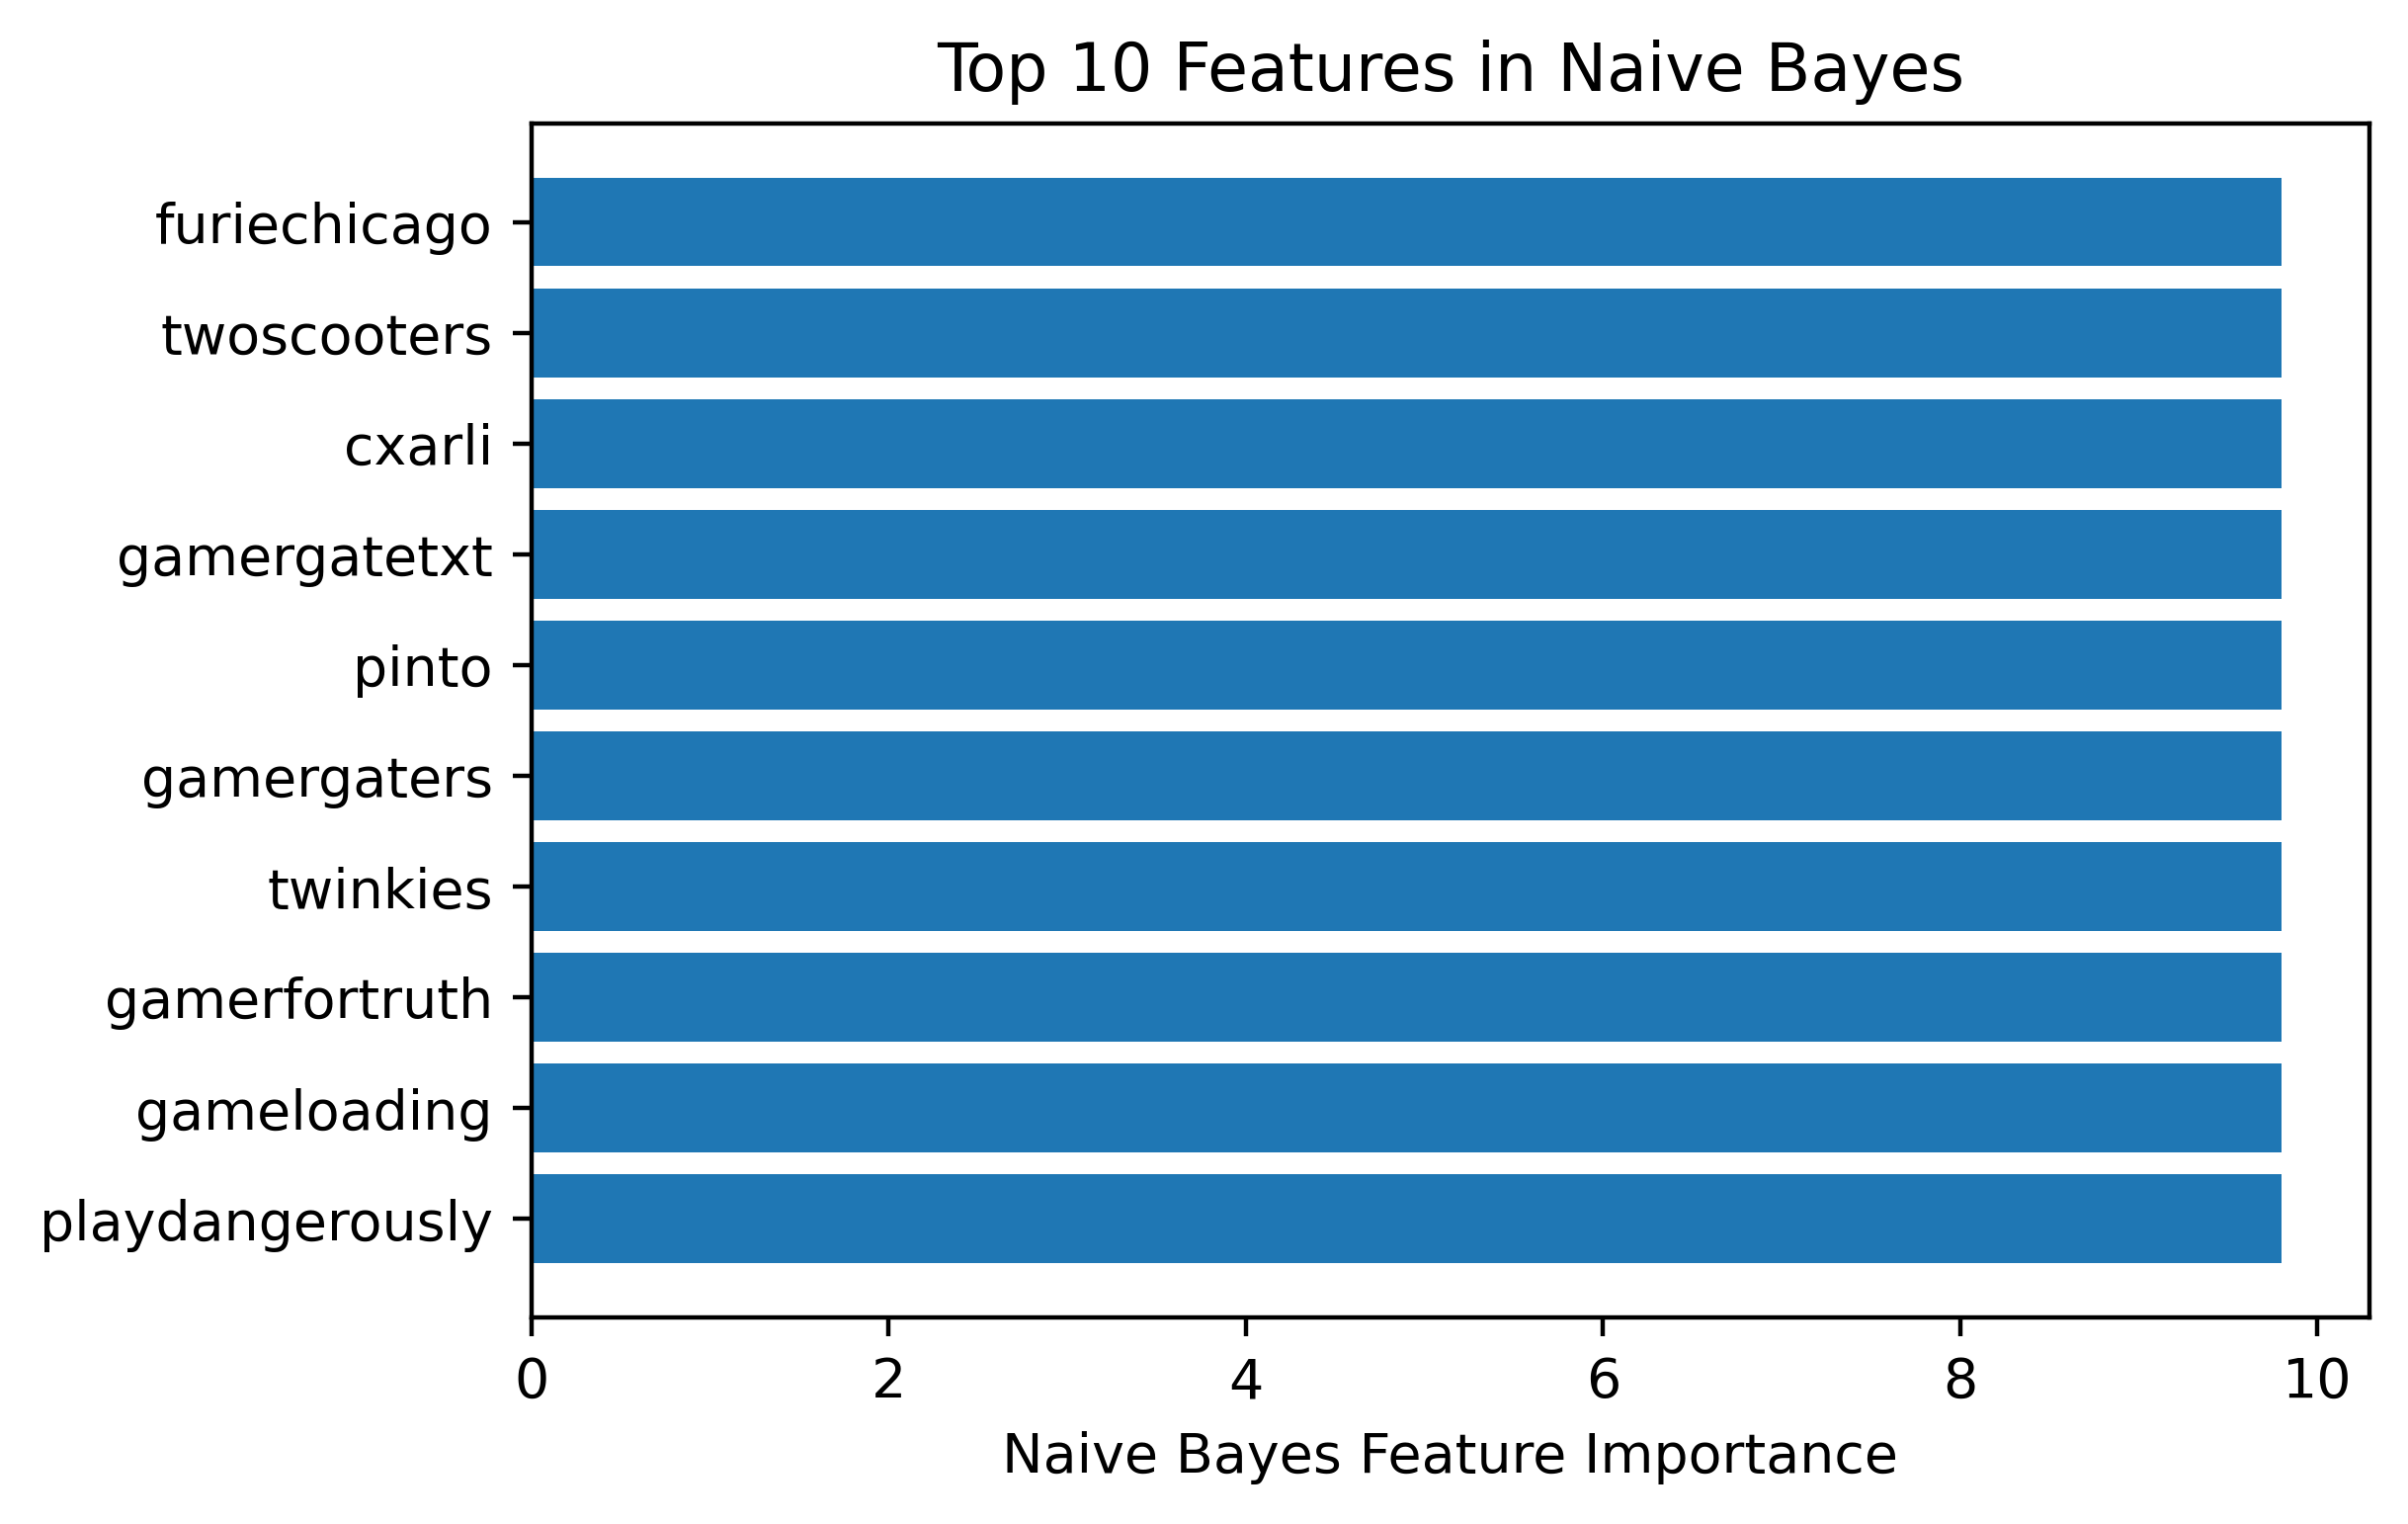

In [17]:
weights = np.absolute(nb_model.coef_)
all_features = train1.columns.values.tolist()[:-1]
weights = weights.reshape(6000,)
top_10_ind = weights.argsort()[::-1][:10]

top_10_features_name = []
top_10_features_weight = []
for i in top_10_ind:
  top_10_features_name.append(all_features[i])
  top_10_features_weight.append(weights[i])

fig, ax = plt.subplots(dpi = 400)
ax.barh(top_10_features_name, 
        top_10_features_weight)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Naive Bayes Feature Importance')
ax.set_title('Top 10 Features in Naive Bayes')
plt.show()

## The following is to implement naive bayes manually without using the sklearn library:

In [ ]:
# def ph_ps (train, label):
#   n = train.shape[0] #size of the dataset
#   d = train.shape[1] #size of features
#   k_class = 2 # num of classes

#   psis = np.zeros([k_class, d])
#   phis = np.zeros(k_class)

#   for k in range(k_class):
#       X_k = train[label == k]
#       phis[k] = X_k.shape[0] / float(n)
#       psis[k] = np.mean(X_k, axis=0)
    
#   return psis, phis

In [ ]:
# k_class = 2
# def NB_model(x, psis, phis):
#     n,d = x.shape
#     x = np.reshape(x, (1, n, d))
#     psis = np.reshape(psis, (k_class, 1, d))
    
#     psis = psis.clip(1e-14, 1-1e-14)
    
#     logpy = np.log(phis).reshape([k_class, 1])
#     logpxy = x*np.log(psis) + (1-x)*np.log(1-psis)
#     logpyx = logpxy.sum(axis=2) + logpy
    
#     return logpyx.argmax(axis=0).flatten(), logpyx.reshape([k_class, n])